## Exercice 2

In [20]:
from scipy.stats import multivariate_normal as multi_gaussian 
import numpy as np

# valeurs théoriques
mean = [5, 10, 2]
std = [[4, 0, 2],
       [0, 3, -4],
       [2, -4, 7]]

In [22]:
for N in [100, 100000]:

    A = multi_gaussian.rvs(mean=mean, cov=std, size=N)

    moy = np.mean(A, axis=0)
    cov = np.cov(A, rowvar=False)

    # Calcul de AA avec broadcasting
    AA = A - moy
    Sb = (1 / N) * AA.T @ AA
    Snb = (1 / (N - 1)) * AA.T @ AA

    print("Moyenne pour N = ", N, " : ", moy)
    print("Covariance pour N =", N, " :  \n", cov)
    print("Matrice Sb:\n", Sb)
    print("Matrice Snb:\n", Snb)

Moyenne pour N =  100  :  [5.13979192 9.73427214 2.55681482]
Covariance pour N = 100  :  
 [[ 5.12140401  0.32956588  2.24944612]
 [ 0.32956588  2.7417686  -3.2055418 ]
 [ 2.24944612 -3.2055418   5.88596689]]
Matrice Sb:
 [[ 5.07018997  0.32627022  2.22695166]
 [ 0.32627022  2.71435092 -3.17348638]
 [ 2.22695166 -3.17348638  5.82710722]]
Matrice Snb:
 [[ 5.12140401  0.32956588  2.24944612]
 [ 0.32956588  2.7417686  -3.2055418 ]
 [ 2.24944612 -3.2055418   5.88596689]]
Moyenne pour N =  100000  :  [ 5.0019259  10.00740165  1.99020929]
Covariance pour N = 100000  :  
 [[ 4.01211748e+00 -3.61567724e-03  2.02003780e+00]
 [-3.61567724e-03  2.99444453e+00 -3.98952163e+00]
 [ 2.02003780e+00 -3.98952163e+00  6.99409818e+00]]
Matrice Sb:
 [[ 4.01207736e+00 -3.61564108e-03  2.02001760e+00]
 [-3.61564108e-03  2.99441459e+00 -3.98948174e+00]
 [ 2.02001760e+00 -3.98948174e+00  6.99402824e+00]]
Matrice Snb:
 [[ 4.01211748e+00 -3.61567724e-03  2.02003780e+00]
 [-3.61567724e-03  2.99444453e+00 -3.98952

Numpy utilise la covariance non-biaisée, comme mentionné dans sa documentation. 

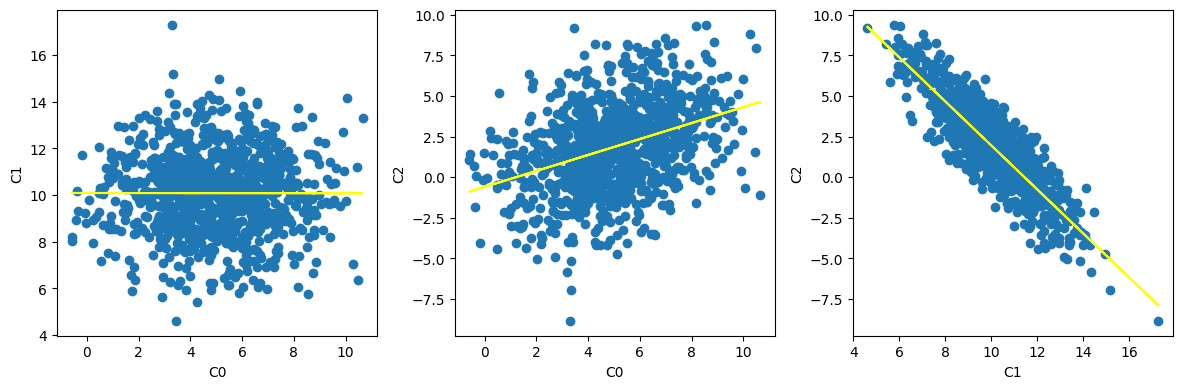

In [34]:
import matplotlib.pyplot as plt 

N = 1000
A = multi_gaussian.rvs(mean=mean, cov=std, size=N)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(A[:, 0], A[:, 1], marker='o')
plt.xlabel('C0')
plt.ylabel('C1')
slope, intercept = np.polyfit(A[:, 0], A[:, 1], 1)
plt.plot(A[:, 0], slope * A[:, 0] + intercept, color='yellow', label='Régression linéaire')

plt.subplot(1, 3, 2)
plt.scatter(A[:, 0], A[:, 2], marker='o')
plt.xlabel('C0')
plt.ylabel('C2')
slope, intercept = np.polyfit(A[:, 0], A[:, 2], 1)
plt.plot(A[:, 0], slope * A[:, 0] + intercept, color='yellow', label='Régression linéaire')

plt.subplot(1, 3, 3)
plt.scatter(A[:, 1], A[:, 2], marker='o')
plt.xlabel('C1')
plt.ylabel('C2')
slope, intercept = np.polyfit(A[:, 1], A[:, 2], 1)
plt.plot(A[:, 1], slope * A[:, 1] + intercept, color='yellow', label='Régression linéaire')

plt.tight_layout()
plt.show()


## Exercice 3

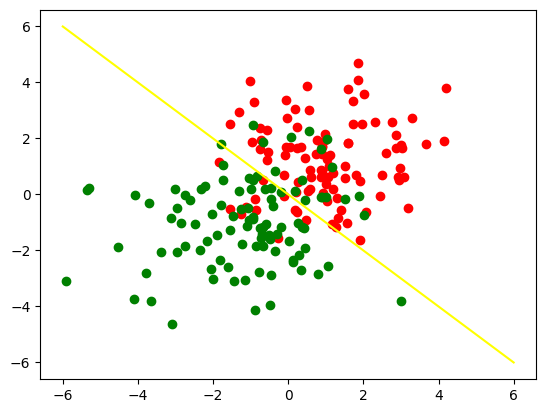

In [ ]:
import numpy as np
from scipy.stats import multivariate_normal as mvn
import matplotlib.pyplot as plt

mu1, mu2 = np.array([1, 1]), np.array([-1, -1])
sig1 = np.array([[2, 0],[0, 2]])
sig2 = np.copy(sig1)

N = 100

X1 = mvn.rvs(mu1, sig1, size=N)
X2 = mvn.rvs(mu2, sig2, size=N)

x = np.linspace(-6, 6, 1000)

def y(x, m1, m2):
    a = (m1 - m2)/(m2-m1)
    b = (m2*m2 - m1*m1)/(m2-m1)
    return a*x + b

plt.figure()
plt.scatter(X1[:,0], X1[:,1], marker='o', color='red')
plt.scatter(X2[:,0], X2[:,1], marker='o', color='green')
plt.plot(x,y(x,1,-1),color='yellow')
plt.show()

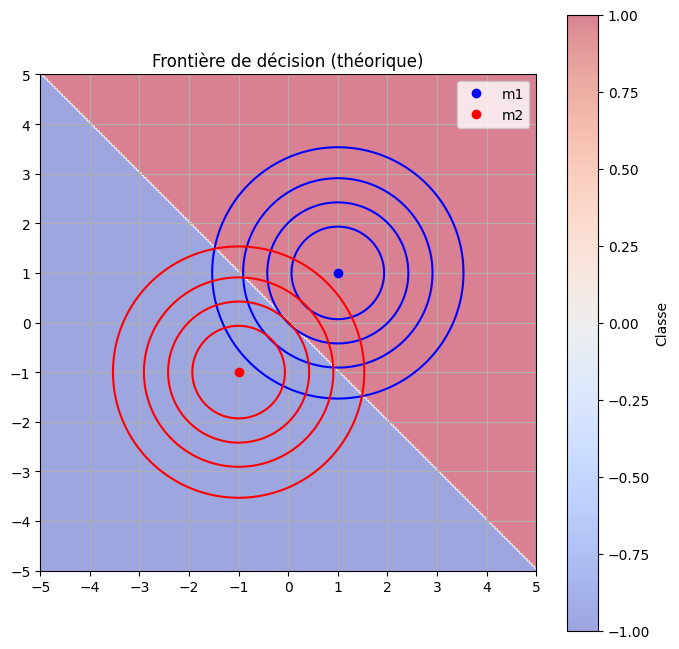

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Paramètres (à définir)
Pw1 = 0.5
Pw2 = 0.5
m1 = [1, 1]
m2 = [-1, -1]
S1 = [[2, 0], [0, 2]]
S2 = [[2, 0], [0, 2]]
cmap = 'coolwarm'  # Exemple de carte de couleurs

# Fonction Gaussienne bidimensionnelle
def Gaussienne(X, Y, mean, cov):
    pos = np.dstack((X, Y))
    return multivariate_normal(mean, cov).pdf(pos)

# Grille de valeurs
x = np.arange(-5, 5.05, 0.05)
y = np.arange(-5, 5.05, 0.05)
X, Y = np.meshgrid(x, y)

# Calcul des densités pondérées
g1 = Pw1 * Gaussienne(X, Y, m1, S1)
g2 = Pw2 * Gaussienne(X, Y, m2, S2)

# Décision basée sur le signe de la différence
decision = np.sign(g1 - g2)

# Affichage de la carte de décision
plt.figure(figsize=(8, 8))
plt.imshow(decision, extent=[-5, 5, -5, 5], origin='lower', cmap=cmap, alpha=0.5)
plt.colorbar(label="Classe")

# Affichage des points moyens et des contours
plt.plot(m1[0], m1[1], 'ob', label='m1')
plt.plot(m2[0], m2[1], 'or', label='m2')
plt.contour(X, Y, g1, levels=5, colors='blue')
plt.contour(X, Y, g2, levels=5, colors='red')

# Configuration de l'axe et légendes
plt.axis([-5, 5, -5, 5])
plt.gca().set_aspect('equal', adjustable='box')
plt.xticks(np.arange(-5, 6, 1))
plt.yticks(np.arange(-5, 6, 1))
plt.grid(True)
plt.box(True)
plt.title("Frontière de décision (théorique)")
plt.legend()
plt.show()


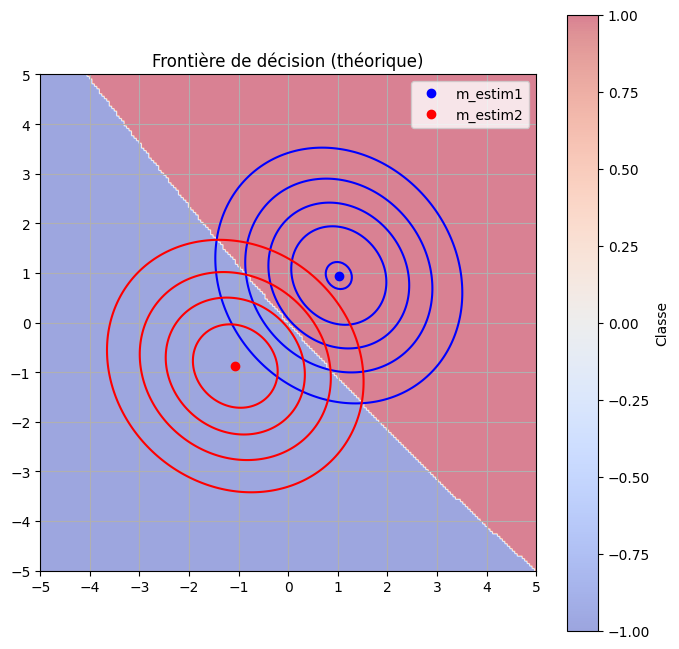

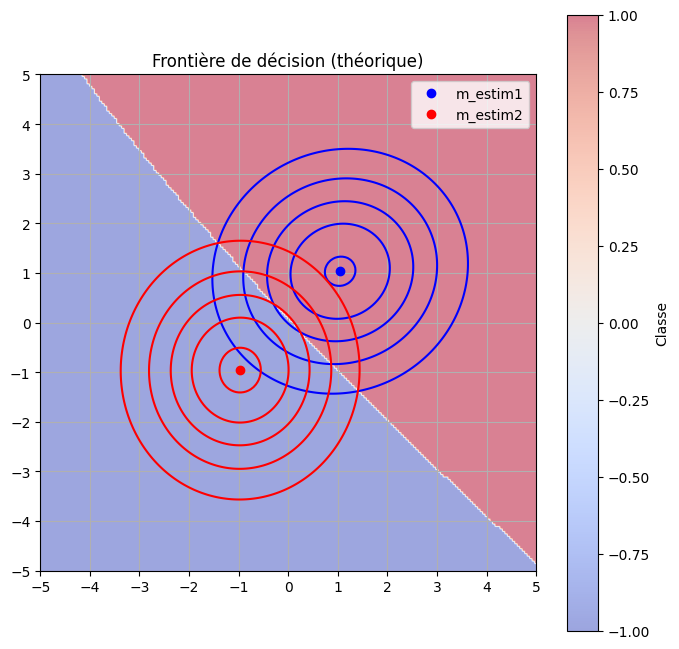

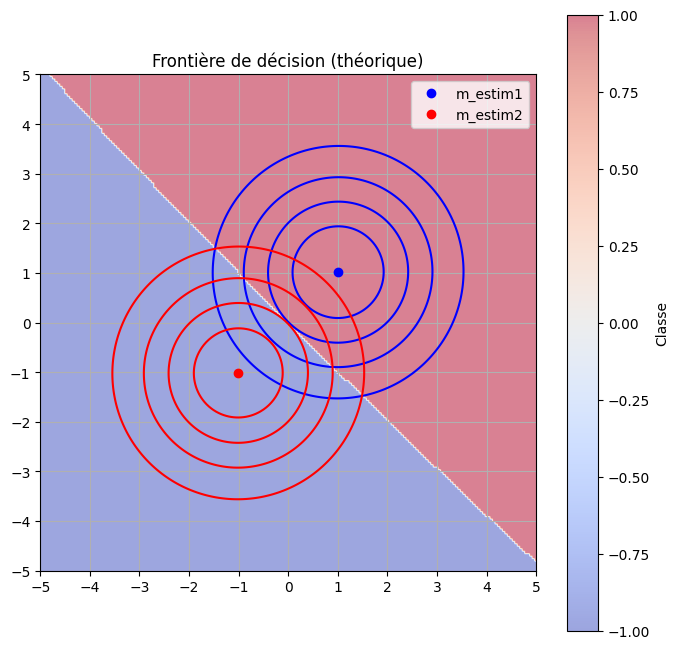

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Paramètres (à définir)
Pw1 = 0.5
Pw2 = 0.5
m1 = [1, 1]
m2 = [-1, -1]
S1 = [[2, 0], [0, 2]]
S2 = [[2, 0], [0, 2]]
cmap = 'coolwarm'  # Exemple de carte de couleurs

for N in [100, 1000, 10000]: 

    X1 = mvn.rvs(m1, S1, size=N)
    X2 = mvn.rvs(m2, S2, size=N)

    moy_estim1 = np.mean(X1, axis=0)
    moy_estim2 = np.mean(X2, axis=0)
    cov_estim1 = np.cov(X1, rowvar=False)
    cov_estim2 = np.cov(X2, rowvar=False)

    # Fonction Gaussienne bidimensionnelle
    def Gaussienne(X, Y, mean, cov):
        pos = np.dstack((X, Y))
        return multivariate_normal(mean, cov).pdf(pos)

    # Grille de valeurs
    x = np.arange(-5, 5.05, 0.05)
    y = np.arange(-5, 5.05, 0.05)
    X, Y = np.meshgrid(x, y)

    # Calcul des densités pondérées
    g1_estim = Pw1 * Gaussienne(X, Y, moy_estim1, cov_estim1)
    g2_estim = Pw2 * Gaussienne(X, Y, moy_estim2, cov_estim2)

    # Décision basée sur le signe de la différence
    decision = np.sign(g1_estim - g2_estim)

    # Affichage de la carte de décision
    plt.figure(figsize=(8, 8))
    plt.imshow(decision, extent=[-5, 5, -5, 5], origin='lower', cmap=cmap, alpha=0.5)
    plt.colorbar(label="Classe")

    # Affichage des points moyens et des contours
    plt.plot(moy_estim1[0], moy_estim1[1], 'ob', label='m_estim1')
    plt.plot(moy_estim2[0], moy_estim2[1], 'or', label='m_estim2')
    plt.contour(X, Y, g1_estim, levels=5, colors='blue')
    plt.contour(X, Y, g2_estim, levels=5, colors='red')

    # Configuration de l'axe et légendes
    plt.axis([-5, 5, -5, 5])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xticks(np.arange(-5, 6, 1))
    plt.yticks(np.arange(-5, 6, 1))
    plt.grid(True)
    plt.box(True)
    plt.title("Frontière de décision (théorique)")
    plt.legend()
    plt.show()


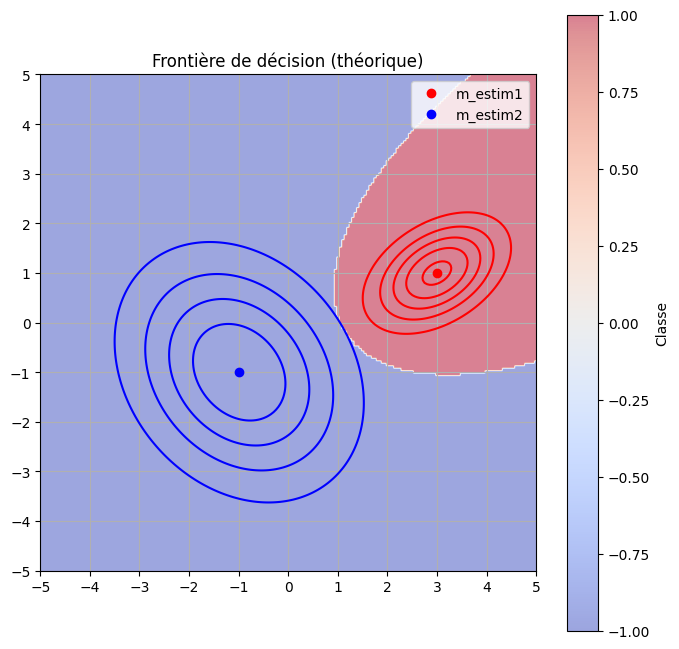

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Paramètres (à définir)

N = 10000
Pw1 = 0.5
Pw2 = 0.5

m1 = [3, 1]
m2 = [-1, -1]
S1 = [[0.5, 0], [0.5, 0.5]]
S2 = [[2, -1], [0, 2]]
cmap = 'coolwarm'  # Exemple de carte de couleurs

X1 = mvn.rvs(m1, S1, size=N)
X2 = mvn.rvs(m2, S2, size=N)

moy_estim1 = np.mean(X1, axis=0)
moy_estim2 = np.mean(X2, axis=0)
cov_estim1 = np.cov(X1, rowvar=False)
cov_estim2 = np.cov(X2, rowvar=False)

# Fonction Gaussienne bidimensionnelle
def Gaussienne(X, Y, mean, cov):
    pos = np.dstack((X, Y))
    return multivariate_normal(mean, cov).pdf(pos)

# Grille de valeurs
x = np.arange(-5, 5.05, 0.05)
y = np.arange(-5, 5.05, 0.05)
X, Y = np.meshgrid(x, y)

# Calcul des densités pondérées
g1_estim = Pw1 * Gaussienne(X, Y, moy_estim1, cov_estim1)
g2_estim = Pw2 * Gaussienne(X, Y, moy_estim2, cov_estim2)

# Décision basée sur le signe de la différence
decision = np.sign(g1_estim - g2_estim)

# Affichage de la carte de décision
plt.figure(figsize=(8, 8))
plt.imshow(decision, extent=[-5, 5, -5, 5], origin='lower', cmap=cmap, alpha=0.5)
plt.colorbar(label="Classe")

# Affichage des points moyens et des contours
plt.plot(moy_estim1[0], moy_estim1[1], 'or', label='m_estim1')
plt.plot(moy_estim2[0], moy_estim2[1], 'ob', label='m_estim2')
plt.contour(X, Y, g1_estim, levels=5, colors='red')
plt.contour(X, Y, g2_estim, levels=5, colors='blue')

# Configuration de l'axe et légendes
plt.axis([-5, 5, -5, 5])
plt.gca().set_aspect('equal', adjustable='box')
plt.xticks(np.arange(-5, 6, 1))
plt.yticks(np.arange(-5, 6, 1))
plt.grid(True)
plt.box(True)
plt.title("Frontière de décision (théorique)")
plt.legend()
plt.show()
